In [5]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__

'2.8.0'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
fashion_train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/fashion-mnist_train.csv', sep=',')
fashion_test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/fashion-mnist_test.csv', sep=',')
# fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep=',')
# fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep=',')

In [8]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
fashion_train_df.shape

(60000, 785)

In [12]:
fashion_test_df.shape

(10000, 785)

In [13]:
training = np.array(fashion_train_df, dtype='float32')
testing = np.array(fashion_test_df, dtype='float32')

label:  1.0


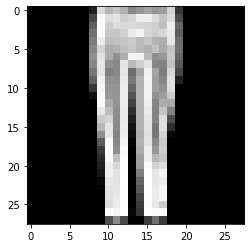

In [14]:
#pegar um item aleatoriamente
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape((28,28)), cmap='gray')
print('label: ', training[i,0])

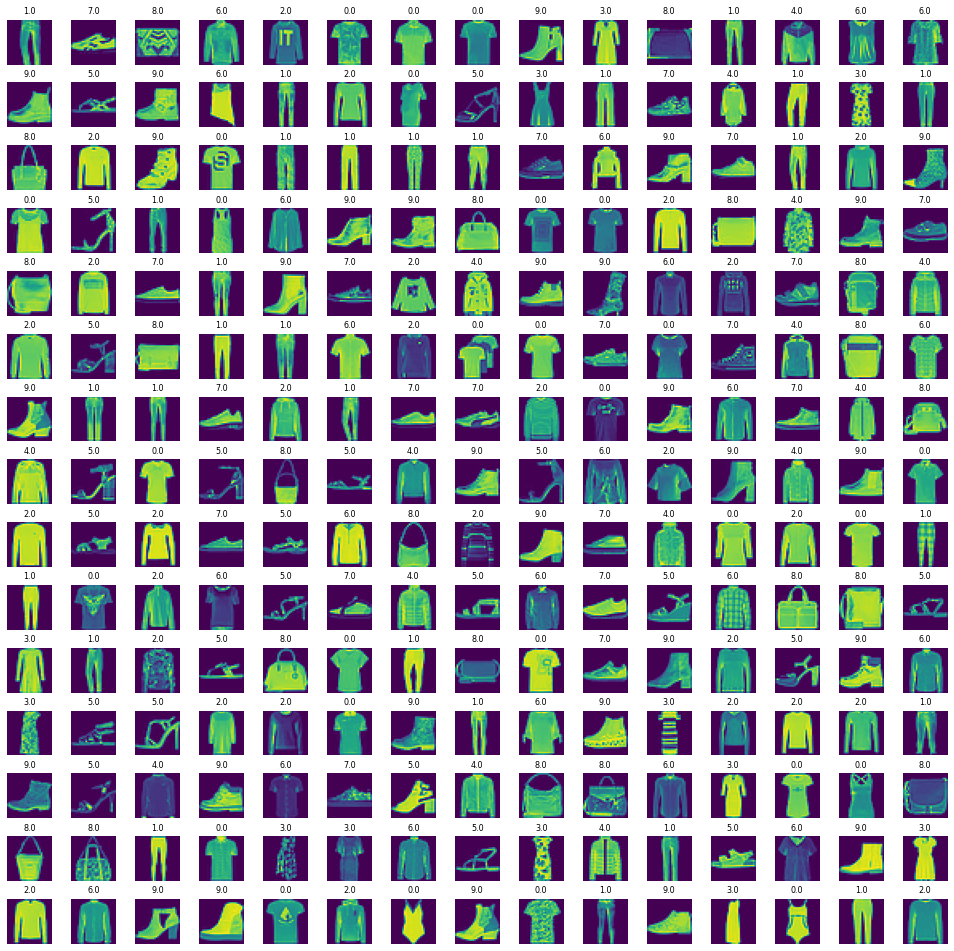

In [15]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid,W_grid, figsize=(17,17))
axes = axes.ravel()
n_training = len(training)

for i in np.arange(0,W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Tratamento dos dados

In [16]:
X_train = training[:,1] / 255 #padorniza os valores entre 0 e 1
Y_train = training[:,0]

In [17]:
X_train

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [18]:
X_test = testing[:,1:] / 255
Y_test = testing[:,0]

In [19]:
X_train.shape

(60000,)

In [20]:
X_train[1]

0.0

In [22]:
X_train = X_train.reshape(X_train.shape[0], * (28,28,1))
X_test = X_test.reshape(X_test.shape[0], * (28,28,1))

ValueError: ignored

In [ ]:
X_test.shape

In [ ]:
X_train.shape

Construção e treinamento do modelo

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
cnn = models.Sequential()
#Camada convolucional
cnn.add(layers.Conv2d(32, (3,3), activation='relu', input_shape=(28,28,1)))
#Camada de polling]
cnn.add(layers.MaxPooling2D(2,2))
#Camada convolucional
cnn.add(layers.Conv2d(64, (3,3), activation='relu'))
#Camada de polling]
cnn.add(layers.MaxPooling2D(2,2))
#Camada convolucional
cnn.add(layers.Conv2d(64, (3,3), activation='relu'))
#Camada de Flattern
cnn.add(layers.Flatten())
#camada densa
cnn.add(layers.Dense(1024,activation='relu'))
#Ultima camada de saida
cnn.add(layers.Dense(10, activation='softmax'))
cnn.summary()

In [ ]:
cnn.compile(loss='sparse_categorical_crossentripy',
            optimizer='Adam', metrics = ['accuracy'])

In [ ]:
epoch_hist = cnn.fit(X_train, Y_train, batch_size=250, epochs=200)

#AVALIAÇÃO DO MODELO

In [ ]:
evaluation = cnn.evaluate(X_test, Y_test)

In [ ]:
prediction = cnn.predict(X_test)
prediction_classes = np.argmax(prediction, axis=1)
prediction_classes

In [ ]:
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize=(12,12))
axes = axes.ravel()
n_traning = len(training)

for i in np.arange(0,W_grid * L_grid):
    axes[i].imshow(X_test[i].reshape((28,28)))
    axes[i].set_title('Prediction Class = {:0.1f}\n True Class = {:0.1f}'.format(prediction_classes[i], Y_test[i], fontsize=8))
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, prediction_classes)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report
num_class = 10
target_names = ["Class {}".format(i) for i in range(num_class)]

In [ ]:
target_names

In [ ]:
print(classification_report(Y_test, prediction_classes, target_names=target_names))